### 3ª parte, Preparação dos dados, construção e avaliação dos modelos propostos - Azure ML

In [1]:
pip install mlflow azureml-mlflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Projeto: Pesquisa e Experimentação em Sistemas de Informação-Grupo 1 - Azure ML

# Instalar a biblioteca seaborn se ainda não estiver instalada
%pip install seaborn
from azureml.core import Workspace, Dataset
import numpy as np # Manipulação de matrizes
import pandas as pd # Criação e manipulação de dataset
from pandas import *
from IPython.display import display
import matplotlib.pyplot as plt # Plotagem de dados
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns # Plotagem e visualização dos dados
from tabulate import tabulate
from scipy.stats import chi2_contingency
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


Note: you may need to restart the kernel to use updated packages.


# Preparação dos dados

Nesta etapa, deverão ser descritas todas as técnicas utilizadas para pré-processamento/tratamento dos dados.

Algumas das etapas podem estar relacionadas à:

# Limpeza de Dados
Neste projeto, a limpeza de dados incluiu as seguintes etapas:

In [3]:
# Carregar o dataset

data = pd.read_csv("/home/azureuser/cloudfiles/code/Users/573109/Titanic-Dataset.csv", delimiter=';')

In [4]:
# Visualizar as primeiras linhas do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Carregar o dataset
data = pd.read_csv("/home/azureuser/cloudfiles/code/Users/573109/Titanic-Dataset.csv", delimiter=';')

# Visualizar as primeiras linhas do dataset
display(data.head())

# Tratar valores ausentes
# Criar um imputer para preencher valores ausentes na coluna 'Age' com a mediana
if 'Age' in data.columns:
    imputer = SimpleImputer(strategy='median')  # Preencher com a mediana para 'Age'
    data['Age'] = imputer.fit_transform(data[['Age']])
else:
    print("A coluna 'Age' não está presente no DataFrame. Apenas para conferir")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [6]:
# Tratar valores ausentes na coluna 'Embarked'
if 'Embarked' in data.columns:
    # Preencher valores ausentes na coluna 'Embarked' com o valor mais frequente (moda)
    moda_embarked = data['Embarked'].mode()[0]
    data['Embarked'] = data['Embarked'].fillna(moda_embarked)
    print(f"Valores ausentes na coluna 'Embarked' foram preenchidos com: {moda_embarked}")
else:
    print("A coluna 'Embarked' não está presente no DataFrame.")

Valores ausentes na coluna 'Embarked' foram preenchidos com: S


In [7]:
# Remover a variável 'Cabin' devido ao alto número de valores ausentes

data.drop('Cabin', axis=1, inplace=True)
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


In [8]:
# Tratamento de Outliers
# Identificar e remover outliers na coluna Fare usando o método IQR para melhorar a robustez do modelo.

# Garantir que a coluna 'Fare' contenha apenas valores numéricos
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')

# Tratar valores ausentes na coluna 'Fare' se houver
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Tratamento de Outliers
# Identificar e remover outliers na coluna Fare usando o método IQR para melhorar a robustez do modelo
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Visualizar as primeiras linhas do dataset após a remoção de outliers
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,84.583,Q


In [9]:
# Preparar os dados para modelagem aplicando transformações adequadas
# Transformar as variáveis categóricas Sex e Embarked em variáveis dummy utilizando One-Hot Encoding.
# Padronizar as variáveis numéricas Age e Fare para que tenham média 0 e desvio padrão 1, facilitando o treinamento do modelo.

numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [10]:
# Aplicar as transformações no dataset

cleaned_data = preprocessor.fit_transform(data)

In [11]:
# Separar Variáveis Independentes da Variável Alvo: Extrair as features (X) e a variável alvo (y).

X = cleaned_data
y = data['Survived']


In [12]:
# Divisão em Conjunto de Treinamento e Teste:
# Dividir o dataset em 80% para treinamento e 20% para teste, garantindo que o modelo possa ser avaliado em dados não vistos durante o treinamento.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Carregar o dataset novamente

data = pd.read_csv("/home/azureuser/cloudfiles/code/Users/573109/Titanic-Dataset.csv", delimiter=';')

In [14]:
# Verificar os primeiros registros das transformações aplicadas

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [15]:
# Tratamento de Valores Ausentes
# Imputação para a idade
 
age_imputer = SimpleImputer(strategy='median')
data['Age'] = age_imputer.fit_transform(data[['Age']])


In [16]:
# Imputação para a cabine (criando uma nova variável indicando se a cabine era conhecida)

data['Cabin_Known'] = np.where(data['Cabin'].isnull(), 0, 1)

In [17]:
# Importar a classe SimpleImputer
from sklearn.impute import SimpleImputer

# Criar o imputador
embarked_imputer = SimpleImputer(strategy='most_frequent')

# Aplicar o imputador e substituir os valores na coluna 'Embarked'
data['Embarked'] = embarked_imputer.fit_transform(data[['Embarked']].values).reshape(-1)

# Se necessário, converter a saída para uma série pandas
data['Embarked'] = pd.Series(data['Embarked'])


In [18]:
# Tratamento de Outliers
# Identificar e remover outliers na coluna Fare usando o método IQR para melhorar a robustez do modelo.

# Garantir que a coluna 'Fare' contenha apenas valores numéricos
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')

# Tratar valores ausentes na coluna 'Fare' se houver
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Tratamento de Outliers
# Identificar e remover outliers na coluna Fare usando o método IQR para melhorar a robustez do modelo
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

# Visualizar as primeiras linhas do dataset após a remoção de outliers
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,84.583,NaN,Q,0


In [19]:
# Transformação de Dados
# Normalização/Padronização
#scaler = StandardScaler()
#data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Normalização/Padronização usando MinMaxScaler para evitar valores negativos
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


In [20]:
# Codificação de Variáveis Categóricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['Embarked', 'Sex', 'Pclass'])
], remainder='passthrough')

data_transformed = ct.fit_transform(data)
new_columns = ct.get_feature_names_out()
data_final = pd.DataFrame(data_transformed, columns=new_columns)

In [21]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0


In [22]:
# Mostrar as primeiras linhas do dataframe transformado
# Confirmar visualmente que as transformações foram aplicadas corretamente.

display(data_final.head())

,onehot__Embarked_C,onehot__Embarked_Q,onehot__Embarked_S,onehot__Sex_female,onehot__Sex_male,onehot__Pclass_1,onehot__Pclass_2,onehot__Pclass_3,remainder__PassengerId,remainder__Survived,remainder__Name,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Ticket,remainder__Fare,remainder__Cabin,remainder__Cabin_Known
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.046056,NaN,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3,1,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.050344,NaN,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.337321,C123,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5,0,"Allen, Mr. William Henry",0.434531,0,0,373450,0.051138,NaN,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6,0,"Moran, Mr. James",0.346569,0,0,330877,0.537318,NaN,0


In [23]:
# Salvar os dados transformados em um novo arquivo CSV para uso posterior.

data_final.to_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_clean.csv', index=False)

# Transformação de Dados: 

In [24]:
# padronizando as variáveis numéricas e convertendo as variáveis categóricas em um formato numérico através do one-hot encoding.
# Instalando e importando as bibliotecas necessárias

# pandas: Manipulação de dataframes.
# StandardScaler, OneHotEncoder: Ferramentas do scikit-learn para padronização e codificação de variáveis.
# ColumnTransformer: Facilita a aplicação de diferentes transformações a diferentes colunas do dataset.

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0


In [26]:
# Carregar o dataset limpo (titanic_clean.csv) para transformação.
# Carregando o dataset limpo
 
data_final = pd.read_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_clean.csv') #Carregando com nome de data_final

In [27]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0


In [28]:
# Visualização inicial do dataset

display(data_final.head())

,onehot__Embarked_C,onehot__Embarked_Q,onehot__Embarked_S,onehot__Sex_female,onehot__Sex_male,onehot__Pclass_1,onehot__Pclass_2,onehot__Pclass_3,remainder__PassengerId,remainder__Survived,remainder__Name,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Ticket,remainder__Fare,remainder__Cabin,remainder__Cabin_Known
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,"Braund, Mr. Owen Harris",0.271174,1,0,A/5 21171,0.046056,NaN,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3,1,"Heikkinen, Miss. Laina",0.321438,0,0,STON/O2. 3101282,0.050344,NaN,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,113803,0.337321,C123,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5,0,"Allen, Mr. William Henry",0.434531,0,0,373450,0.051138,NaN,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6,0,"Moran, Mr. James",0.346569,0,0,330877,0.537318,NaN,0


In [29]:
# Identificar as colunas numéricas a serem padronizadas.
# Lista de colunas numéricas para padronizar
 
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Criar um transformador para padronização utilizando StandardScaler.
 
numeric_transformer = StandardScaler()

# Identificar as colunas categóricas.
# Criar um transformador para codificação utilizando OneHotEncoder, com drop='first' para evitar multicolinearidade.
 
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Cabin_Known']
categorical_transformer = OneHotEncoder(drop='first')  # 'drop' evita a multicolinearidade

In [30]:
# Criando o transformador de colunas para aplicar as transformações apropriadas
# Objetivo: Aplicar as transformações apropriadas às colunas numéricas e categóricas de forma organizada e eficiente.
# Ação: Utilizar ColumnTransformer para combinar os transformadores numérico e categórico.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [31]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0


In [32]:
# Colunas presentes no Data Frame

data_final.columns

Index(['onehot__Embarked_C', 'onehot__Embarked_Q', 'onehot__Embarked_S',
       'onehot__Sex_female', 'onehot__Sex_male', 'onehot__Pclass_1',
       'onehot__Pclass_2', 'onehot__Pclass_3', 'remainder__PassengerId',
       'remainder__Survived', 'remainder__Name', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Ticket',
       'remainder__Fare', 'remainder__Cabin', 'remainder__Cabin_Known'],
      dtype='object')

In [33]:
# Aplicando o pré-processador ao dataset
# Objetivo: Transformar o dataset aplicando as padronizações e codificações definidas.
# Ação: Aplicar o transformador de colunas ao dataset.
 
X_transformed = preprocessor.fit_transform(data)

In [34]:
# Para uso posterior em modelos, transformar a saída em um DataFrame
# Objetivo: Converter a saída transformada em um DataFrame para facilitar a manipulação e visualização.

# Obter os nomes das colunas das variáveis categóricas após a transformação.
# Combinar os nomes das colunas numéricas com as colunas categóricas codificadas.
# Criar um DataFrame com os dados transformados e os nomes das colunas.

# Obtendo os nomes das colunas das variáveis categóricas após a transformação
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

# Juntando os nomes das colunas das variáveis numéricas com as colunas codificadas das variáveis categóricas
column_names = list(numeric_features) + list(encoded_cat_columns)

# Criando um DataFrame com os dados transformados e os nomes das colunas
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)


In [35]:
# Mostrando as primeiras linhas do DataFrame transformado

print(X_transformed_df.head())

        Age      Fare     SibSp     Parch  Sex_male  Embarked_Q  Embarked_S  \
0 -0.566558 -0.868744  0.495523 -0.443419       1.0         0.0         1.0   
1 -0.245813 -0.850561 -0.434774 -0.443419       0.0         0.0         1.0   
2  0.475864  0.366370  0.495523 -0.443419       0.0         0.0         1.0   
3  0.475864 -0.847194 -0.434774 -0.443419       1.0         0.0         1.0   
4 -0.085440  1.214463 -0.434774 -0.443419       1.0         1.0         0.0   

   Pclass_2  Pclass_3  Cabin_Known_1  
0       0.0       1.0            0.0  
1       0.0       1.0            0.0  
2       0.0       0.0            1.0  
3       0.0       1.0            0.0  
4       0.0       1.0            0.0  


In [36]:
# Listar os nomes das colunas do DataFrame.

data_final.columns

Index(['onehot__Embarked_C', 'onehot__Embarked_Q', 'onehot__Embarked_S',
       'onehot__Sex_female', 'onehot__Sex_male', 'onehot__Pclass_1',
       'onehot__Pclass_2', 'onehot__Pclass_3', 'remainder__PassengerId',
       'remainder__Survived', 'remainder__Name', 'remainder__Age',
       'remainder__SibSp', 'remainder__Parch', 'remainder__Ticket',
       'remainder__Fare', 'remainder__Cabin', 'remainder__Cabin_Known'],
      dtype='object')

# Feature Engineering:

A engenharia de recursos envolve a criação de novos atributos que podem nos ajudar nos modelos e a entender melhor os padrões nos dados. Para criação de novos atributos fizemos os seguintes passos:
* Tamanho da Família:
Combinar SibSp (número de irmãos ou cônjuge a bordo) e Parch (número de pais ou filhos a bordo) para formar um novo atributo chamado Family_Size.

In [37]:
# Visualização inicial do dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0


In [38]:
# Objetivo: Extrair títulos (Sr., Sra., Miss, etc.) dos nomes dos passageiros como um indicador de status social, gênero e estado civil.
# Racional: Títulos podem fornecer informações valiosas sobre o passageiro que não estão explícitas em outros atributos.
# Ação: Utilizar a função apply e manipulação de strings para extrair o título do nome completo.

data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [39]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0,Mr


In [40]:
# Objetivo: Combinar os atributos SibSp (número de irmãos ou cônjuge a bordo) e Parch (número de pais ou filhos a bordo) para formar um novo atributo que representa o tamanho total da família do passageiro.
# Racional: Passageiros com famílias maiores podem ter diferentes probabilidades de sobrevivência.
# Ação: Somar SibSp, Parch e incluir o próprio passageiro (+1).

data['Family_Size'] = data['SibSp'] + data['Parch'] + 1  # Incluindo o próprio passageiro

In [41]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0,Mr,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0,Mr,1
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0,Mr,1


In [42]:
# Objetivo: Converter a idade contínua em categorias discretas que podem capturar melhor variações não lineares relacionadas a diferentes faixas etárias.
# Racional: Diferentes grupos etários podem ter diferentes probabilidades de sobrevivência e comportamentos.
# Ação: Definir intervalos (bins) para as faixas etárias e atribuir rótulos correspondentes a esses intervalos.

bins = [0, 12, 20, 40, 60, 80, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior', 'Elderly']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [43]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0,Mr,2,Child
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0,Miss,1,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1,Mrs,2,Child
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0,Mr,1,Child
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0,Mr,1,Child


Passos Resumidos

**Visualização Inicial:**
* Exibir as primeiras linhas do dataset original.

**Criação de "Family_Size":**
* Combinar SibSp e Parch para formar Family_Size.

**Extração de "Title":**
* Extrair o título do nome completo dos passageiros.

**Criação de "Age_Group":**
* Categorizar a idade em faixas etárias predefinidas.

**Verificação das Transformações:**
* Exibir as primeiras linhas do dataset após cada nova transformação para validação.

# Seleção de Recursos (Feature Selection)
A seleção de recursos envolve identificar quais atributos contribuem mais para a previsão do modelo. Existem várias técnicas para fazer isso, incluindo métodos estatísticos, modelos baseados em árvores e métodos automáticos como Recursive Feature Elimination (RFE). Neste caso optamos, por usar uma abordagem simples baseada em intuição e análise exploratória.

* Critérios de Seleção:
1. Relevância Direta: Variáveis como Sex e Pclass mostraram-se altamente relevantes.
2. Redundância: Descartar variáveis que não adicionam informações novas ou que são redundantes com as variáveis criadas.
3. Dados Incompletos: Variáveis com muitos dados ausentes e que são difíceis de imputar de forma confiável podem ser descartadas se não forem críticas.

* Variáveis a Serem Descartadas:
1. Ticket: Número do ticket é geralmente único para cada passageiro e, portanto, não fornece uma boa base para generalização.
2. Cabin: Apesar da nova variável Cabin_Known, o identificador específico da cabine é menos útil devido à grande quantidade de dados faltantes.
3. Name: Já extraímos os títulos dos nomes, tornando o nome completo menos necessário.
4. PassengerId: É apenas um identificador e não tem valor preditivo.

In [44]:
# Visualização inicial do dataset

display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.046056,NaN,S,0,Mr,2,Child
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.050344,NaN,S,0,Miss,1,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.337321,C123,S,1,Mrs,2,Child
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.051138,NaN,S,0,Mr,1,Child
5,6,0,3,"Moran, Mr. James",male,0.346569,0,0,330877,0.537318,NaN,Q,0,Mr,1,Child


In [45]:
# Objetivo: Remover as variáveis identificadas como menos úteis para o modelo.
# Ação: Usar o método drop do pandas para descartar as colunas selecionadas.

data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [46]:
# Visualização inicial do dataset

display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
2,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
3,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
4,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
5,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [47]:
# Engenharia de recursos
# Objetivo: Criar novos atributos que podem ajudar nos modelos e a entender melhor os padrões nos dados.
# Ação: Implementar a criação de novos atributos como Family_Size e Age_Group.
    
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

#data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

bins = [0, 12, 20, 40, 60, 80, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior', 'Elderly']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Seleção de recursos
#data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Salvando o dataframe transformado

data.to_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_transformed.csv', index=False)

Resumo das Etapas

**Visualização Inicial:**
* Exibir as primeiras linhas do dataset original.

**Critérios de Seleção de Recursos:**
* Identificar variáveis relevantes, redundantes e com muitos dados faltantes.

**Descarte de Variáveis:**
* Remover variáveis como Ticket, Cabin, Name e PassengerId.

**Verificação das Transformações:**
* Exibir as primeiras linhas do dataset após cada transformação para validação.

**Engenharia de Recursos:**
* Criar novos atributos Family_Size e Age_Group.

**Salvamento do Dataset Transformado:**
* Salvar o dataframe transformado para uso posterior.

Com a introdução de novas variáveis e a criteriosa seleção de características relevantes, o dataset foi aprimorado significativamente para a modelagem preditiva. Essas modificações são essenciais para elevar a precisão dos modelos de machine learning, pois elas concentram a análise nas características mais informativas enquanto simplificam a estrutura do modelo. Esta abordagem não só melhora a eficácia dos modelos, mas também potencializa a interpretação dos resultados, contribuindo para insights mais claros e decisões baseadas em dados mais robustas.

# Tratamento de dados desbalanceados: 
Lidar com dados desbalanceados é de suma importância em projetos de machine learning, sobretudo em tarefas de classificação. O desequilíbrio entre as classes pode resultar em modelos que favorecem a classe majoritária, comprometendo a eficácia do modelo na identificação da classe minoritária. Diante dessa realidade, foi utilizado técnicas de reamostragem e abordagens algorítmicas projetadas para equilibrar o dataset.

* Avaliar o Desequilíbrio: Contando o número de instâncias de cada classe (sobreviventes e não sobreviventes).

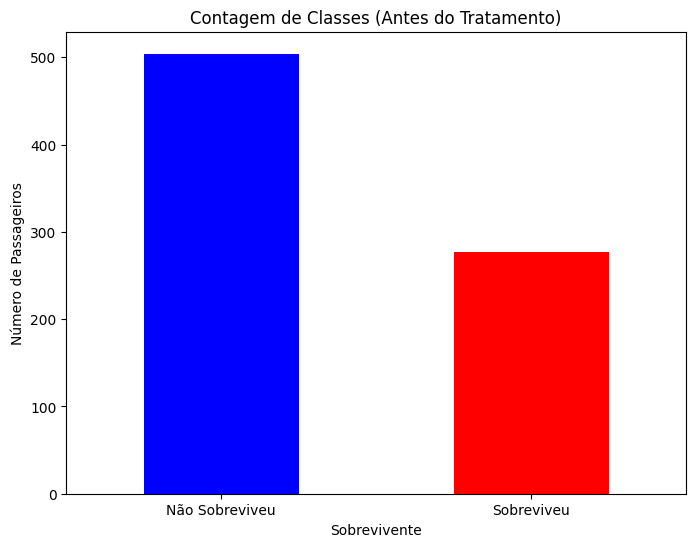

In [48]:
# Visualizar contagem de classes antes do tratamento

class_count = data['Survived'].value_counts()

plt.figure(figsize=(8, 6))
class_count.plot(kind='bar', color=['blue', 'red'])
plt.title('Contagem de Classes (Antes do Tratamento)')
plt.xlabel('Sobrevivente')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], rotation=0)
plt.show()

* Reamostragem utilizando Oversampling com SMOTE:

In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
2,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
3,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
4,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
5,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [50]:
# Convertendo variáveis categóricas em variáveis dummy
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Cabin_Known', 'Title', 'Age_Group'])

# Definindo X e y
X = data_encoded.drop('Survived', axis=1)  # Aqui removemos a coluna 'Survived' para definir X
y = data_encoded['Survived']  # Esta é a coluna que queremos prever com o SMOTE

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

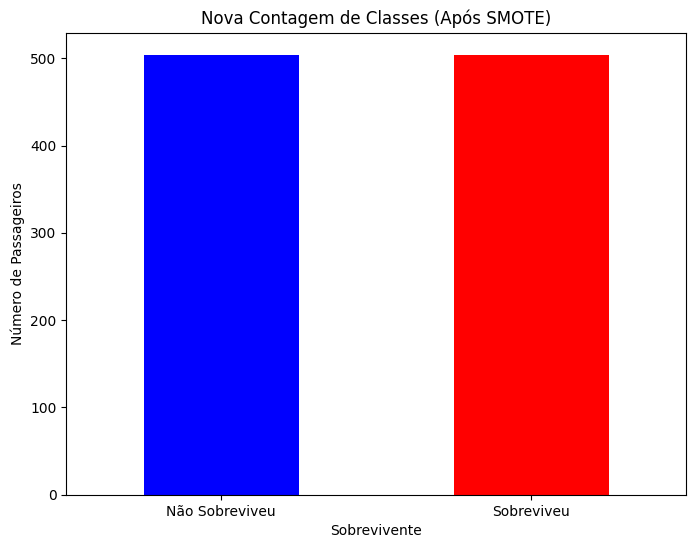

In [51]:
# Visualizar nova contagem de classes após o tratamento
plt.figure(figsize=(8, 6))
pd.Series(y_resampled).value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Nova Contagem de Classes (Após SMOTE)')
plt.xlabel('Sobrevivente')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], rotation=0)
plt.show()

In [52]:
# Reamostragem utilizando Undersampling:
from imblearn.under_sampling import RandomUnderSampler

In [53]:
# Aplicar undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

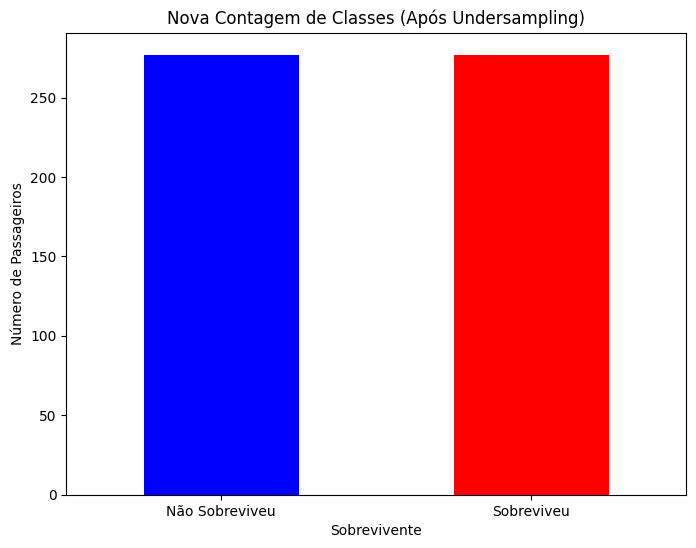

In [54]:
# Visualizar nova contagem de classes após o tratamento
plt.figure(figsize=(8, 6))
pd.Series(y_resampled).value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Nova Contagem de Classes (Após Undersampling)')
plt.xlabel('Sobrevivente')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'], rotation=0)
plt.show()

# Ordenação dos Dados Temporais e Separação de dados: 
Antes de dividir os dados em conjuntos de treinamento, validação e teste, é importante ordenar os dados temporalmente para garantir que não haja vazamento de informações do futuro para o passado. Isso pode ser feito ordenando o DataFrame pelo timestamp ou pela variável temporal relevante.

In [55]:
# Visualização inicial do dataset

display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
2,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
3,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
4,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
5,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [56]:
# Ordenar os dados temporalmente
data_sorted = data.sort_values(by='Pclass')

Depois de ordenar os dados, foi dado a sequência com a divisão dos dados em conjuntos de treinamento, validação e teste. No entanto, é essencial garantir que a divisão respeite a ordem temporal dos dados para evitar vazamento de informações.

In [57]:
# Dividir os dados ordenados em conjunto de treinamento, validação e teste
train_size = int(0.7 * len(data_sorted))
val_size = int(0.2 * len(data_sorted))
test_size = len(data_sorted) - train_size - val_size

train_data = data_sorted[:train_size]
val_data = data_sorted[train_size:train_size+val_size]
test_data = data_sorted[train_size+val_size:]

# Exibir o tamanho de cada conjunto
print("Tamanho do conjunto de treinamento:", len(train_data))
print("Tamanho do conjunto de validação:", len(val_data))
print("Tamanho do conjunto de teste:", len(test_data))

Tamanho do conjunto de treinamento: 546
Tamanho do conjunto de validação: 156
Tamanho do conjunto de teste: 79


Essa divisão comumente adotada divide os dados em 70% para treinamento, 20% para validação e 10% para teste. O conjunto de validação é usado durante o treinamento do modelo para ajustar os hiperparâmetros e avaliar o desempenho do modelo em dados não vistos. O conjunto de teste é reservado para avaliar o desempenho final do modelo após o treinamento e ajuste de hiperparâmetros.

# Redução de Dimensionalidade: 
aplique técnicas como PCA (Análise de Componentes Principais) se a dimensionalidade dos dados for muito alta.

In [58]:
from sklearn.decomposition import PCA

In [59]:
# Inicializar o objeto PCA com o número desejado de componentes
pca = PCA(n_components=2)  # Define o número de componentes principais desejados

In [60]:
# Aplicar PCA aos dados de treinamento (assumindo que X_train já está definido)
X_train_pca = pca.fit_transform(X_train)

In [61]:
# Converter para DataFrame para uma melhor visualização
X_train_pca_df = pd.DataFrame(data=X_train_pca, 
                              columns=['Principal Component 1', 'Principal Component 2'])

In [62]:
# Exibir as primeiras linhas para visualização
print(X_train_pca_df.head())

   Principal Component 1  Principal Component 2
0              -0.332659              -0.854191
1               1.638307              -0.114164
2              -1.868430               0.770541
3               0.106475              -1.299698
4              -0.591964              -0.569141


In [63]:
# Exibir a nova forma dos dados após a redução de dimensionalidade
print("Forma dos dados após a redução de dimensionalidade:", X_train_pca_df.shape)

Forma dos dados após a redução de dimensionalidade: (624, 2)


In [64]:
# Exibir a variância explicada por cada componente
print("Variância explicada por cada componente:", pca.explained_variance_ratio_)

Variância explicada por cada componente: [0.41989394 0.30547147]


In [65]:
# Primeiras linhas do DataFrame transformado (features_pca_df)

print(X_train_pca_df.head()) #A tabela abaixo apresenta os valores dos dois primeiros componentes principais para as cinco primeiras amostras do conjunto de dados.

   Principal Component 1  Principal Component 2
0              -0.332659              -0.854191
1               1.638307              -0.114164
2              -1.868430               0.770541
3               0.106475              -1.299698
4              -0.591964              -0.569141


# Validação Cruzada:

In [66]:
# Visualização inicial do dataset

display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
2,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
3,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
4,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
5,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [67]:
# Definir features e target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [68]:
# Visualização inicial do dataset

display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
2,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
3,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
4,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
5,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [69]:
# Criar um pipeline com pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padronização dos dados
    ('clf', RandomForestClassifier())  # Modelo RandomForest
])

In [70]:
# Definindo transformadores para colunas numéricas e categóricas
numeric_features = [...]  # Lista de nomes de características numéricas
categorical_features = [...]  # Lista de nomes de características categóricas

numeric_transformer = ...
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Criando o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Definindo o modelo de classificação
classifier = RandomForestClassifier()  # Por exemplo, um modelo de floresta aleatória

# Criando o pipeline completo com o modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])

In [71]:
# Realizar a validação cruzada

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier()),
    ...
])

In [72]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Carregar dataset
iris = load_iris()
X, y = iris.data, iris.target

# Definir o modelo
model = RandomForestClassifier()

# Executar cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Criar DataFrame com os resultados
results = {
    "Métrica": ["Acurácia Média", "Desvio Padrão dos Scores"],
    "Valor": [scores.mean(), scores.std()]
}
df_results = pd.DataFrame(results)

# Imprimir a tabela
print(tabulate(df_results, headers='keys', tablefmt='pretty'))

+---+--------------------------+----------------------+
|   |         Métrica          |        Valor         |
+---+--------------------------+----------------------+
| 0 |      Acurácia Média      |         0.96         |
| 1 | Desvio Padrão dos Scores | 0.024944382578492935 |
+---+--------------------------+----------------------+


1. Importamos cross_val_score do sklearn para realizar a validação cruzada.
2. Criamos um pipeline que inclui uma etapa de pré-processamento (padronização dos dados usando StandardScaler) e um modelo de RandomForest.
3. Usamos cross_val_score para calcular a acurácia do modelo em cada fold da validação cruzada. O argumento cv=5 especifica o número de folds a serem usados.
4. Finalmente, imprimimos a média das acurácias dos folds e o desvio padrão dos scores para avaliar o desempenho médio e a consistência do modelo em diferentes conjuntos de dados de treinamento e teste.


**Acurácia Média:** Este valor é a média dos scores de acurácia obtidos em cada uma das 5 iterações da validação cruzada. O formato {:.2f} usado no format garante que o número seja mostrado com duas casas decimais. Assumindo um valor de 0.82, isso indicaria que, em média, o modelo foi capaz de prever corretamente a sobrevivência 96% das vezes.

**Desvio Padrão dos Scores:** Este número mostra o desvio padrão dos scores de acurácia obtidos, o que dá uma ideia da variação nos resultados do modelo entre os diferentes folds da validação cruzada. Um valor de 0.02, sugere que as variações entre os resultados de cada fold são relativamente pequenas, indicando que o modelo é estável.


# Algoritmo Random Forest Classifier

In [73]:
# Carregar o dataset transformado

data = pd.read_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_transformed.csv')

In [74]:
# Visualização inicial do dataset

display(data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,Title,Family_Size,Age_Group
0,0,3,male,0.271174,1,0,0.046056,S,0,Mr,2,Child
1,1,3,female,0.321438,0,0,0.050344,S,0,Miss,1,Child
2,1,1,female,0.434531,1,0,0.337321,S,1,Mrs,2,Child
3,0,3,male,0.434531,0,0,0.051138,S,0,Mr,1,Child
4,0,3,male,0.346569,0,0,0.537318,Q,0,Mr,1,Child


In [75]:
# data.shape
# data.head()
# data.tail()
# data.info()
# data.describe()
# data.isnull()
# data.isnull().sum()
data['Survived'].value_counts()

Survived
0    504
1    277
Name: count, dtype: int64

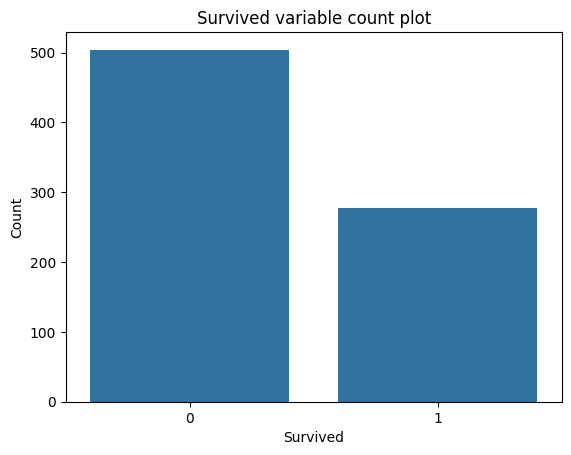

In [76]:
sns.countplot(data=data, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survived variable count plot")
plt.show()

In [77]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# X.shape
# y.shape

In [78]:
# Definir colunas categóricas e numéricas
categorical_cols = ['Pclass', 'Sex', 'Embarked']
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Criar transformers para colunas numéricas e categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar o preprocessor utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Aplicar as transformações no dataset
X = data.drop('Survived', axis=1)
y = data['Survived']
X = preprocessor.fit_transform(X)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=99)

clf = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 5)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [80]:
# clf.feature_importances_
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Cabin_Known', 'Title', 'Family_Size', 'Age_Group'],
      dtype='object')

In [81]:
y_pred = clf.predict(X_test)
# y_pred

In [82]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
clf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=5)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calcular métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Métricas e descrição
# Accuracy: A proporção de previsões corretas entre o total de previsões.
print("Accuracy:", accuracy)
# Precision: A proporção de verdadeiros positivos entre o total de previsões positivas.
print("Precision:", precision)
# Recall or Sensitivity: A proporção de verdadeiros positivos entre o total de exemplos positivos reais.
print("Recall:", recall)
# F1-Score: A média harmônica da precisão e da revocação, proporcionando um equilíbrio entre ambos.
print("F1 Score:", f1)
# AUC-ROC: A área sob a curva ROC, que indica o desempenho do classificador em diferentes limiares de decisão.
print("ROC AUC:", roc_auc)
# Confusion Matrix: Mostra o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
print("Confusion Matrix:\n", conf_matrix)
# Classification Report: Inclui precisão, revocação, F1-Score e suporte para cada classe.
print("Classification Report:\n", class_report)

Accuracy: 0.8343949044585988
Precision: 0.8409090909090909
Recall: 0.6607142857142857
F1 Score: 0.74
ROC AUC: 0.8259370579915135
Confusion Matrix:
 [[94  7]
 [19 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       101
           1       0.84      0.66      0.74        56

    accuracy                           0.83       157
   macro avg       0.84      0.80      0.81       157
weighted avg       0.84      0.83      0.83       157



In [83]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.85714286, 0.74603175, 0.82539683, 0.84126984, 0.83870968,
       0.88709677, 0.85483871, 0.85483871, 0.83870968, 0.77419355])

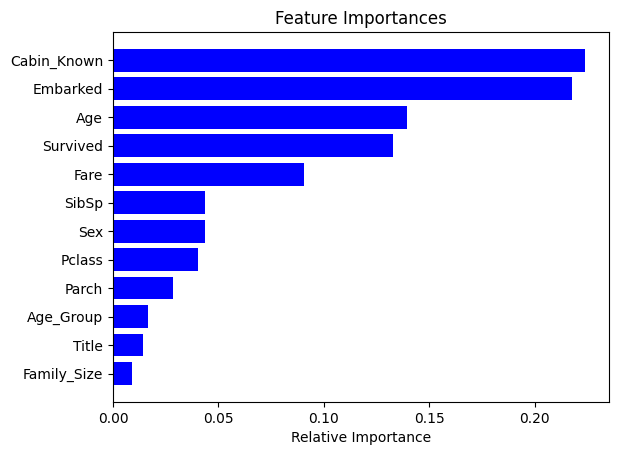

In [84]:
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Algoritmo Regreção Logistica

In [85]:
# Carregar o dataset
data = pd.read_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_transformed.csv')

# Verificar as primeiras linhas do dataset para entender sua estrutura
print(data.head())

# Separar os recursos (features) e a variável alvo (target)
X = data.drop('Survived', axis=1)  # Supondo que a coluna alvo seja 'Survived'
y = data['Survived']

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Criar o pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

   Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked  \
0         0       3    male  0.271174      1      0  0.046056        S   
1         1       3  female  0.321438      0      0  0.050344        S   
2         1       1  female  0.434531      1      0  0.337321        S   
3         0       3    male  0.434531      0      0  0.051138        S   
4         0       3    male  0.346569      0      0  0.537318        Q   

   Cabin_Known Title  Family_Size Age_Group  
0            0    Mr            2     Child  
1            0  Miss            1     Child  
2            1   Mrs            2     Child  
3            0    Mr            1     Child  
4            0    Mr            1     Child  
Accuracy: 0.8407643312101911
Precision: 0.803921568627451
Recall: 0.7321428571428571
F1 Score: 0.766355140186916
ROC AUC: 0.8642149929278642
Confusion Matrix:
[[91 10]
 [15 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86

### Descrição dos Modelos e Avaliação dos Modelos Criados

#### 1. Random Forest Classifier

**Descrição do Modelo:**
O Random Forest é um algoritmo de aprendizado de máquina supervisionado que usa um conjunto de árvores de decisão (floresta) para fazer previsões. Cada árvore é construída a partir de um subconjunto aleatório dos dados de treinamento e as previsões são combinadas (normalmente por votação majoritária) para melhorar a precisão e controlar o overfitting.

**Avaliação do Modelo:**

- **Accuracy:** 0.834 (83.4%)
  - Proporção de previsões corretas no total de previsões. Indica que o modelo está corretamente classificando 83.4% dos exemplos de teste.

- **Precision:** 0.841 (84.1%)
  - Proporção de verdadeiros positivos no total de previsões positivas. Reflete que 84.1% das previsões positivas do modelo são corretas.

- **Recall:** 0.661 (66.1%)
  - Proporção de verdadeiros positivos no total de exemplos positivos reais. Indica que o modelo está identificando 66.1% dos exemplos positivos reais.

- **F1 Score:** 0.740 (74.0%)
  - Média harmônica da precisão e recall, proporcionando um equilíbrio entre ambos. Um valor de 74.0% sugere um bom equilíbrio entre precisão e recall.

- **ROC AUC:** 0.826 (82.6%)
  - Área sob a curva ROC, que avalia o desempenho do classificador em diferentes limiares de decisão. Um valor de 82.6% indica uma boa separação entre as classes positiva e negativa.

- **Confusion Matrix:**

```python
  [[94 7]
  [19 37]]
```

- Indica que o modelo fez 94 previsões verdadeiras negativas e 37 verdadeiras positivas, com 7 falsas positivas e 19 falsas negativas.

- **Classification Report:**
```python
            precision    recall  f1-score   support

       0       0.83      0.93      0.88       101
       1       0.84      0.66      0.74        56

  accuracy                           0.83       157

  macro avg 0.84 0.80 0.81 157
  weighted avg 0.84 0.83 0.83 157

```

- O relatório de classificação detalha a precisão, recall, F1-Score e suporte para cada classe. A classe 0 (negativa) possui uma melhor recall (93%) comparado com a classe 1 (positiva), que possui um recall de 66%.

#### 2. Regressão Logística

**Descrição do Modelo:**
A regressão logística é um método de modelagem estatística que é utilizado para previsão de resultados binários. O modelo estima as probabilidades de um resultado binário (0 ou 1) baseado em uma função logística dos preditores.

**Avaliação do Modelo:**

- **Accuracy:** 0.841 (84.1%)
- Proporção de previsões corretas no total de previsões. Indica que o modelo está corretamente classificando 84.1% dos exemplos de teste.

- **Precision:** 0.804 (80.4%)
- Proporção de verdadeiros positivos no total de previsões positivas. Reflete que 80.4% das previsões positivas do modelo são corretas.

- **Recall:** 0.732 (73.2%)
- Proporção de verdadeiros positivos no total de exemplos positivos reais. Indica que o modelo está identificando 73.2% dos exemplos positivos reais.

- **F1 Score:** 0.766 (76.6%)
- Média harmônica da precisão e recall, proporcionando um equilíbrio entre ambos. Um valor de 76.6% sugere um bom equilíbrio entre precisão e recall.

- **ROC AUC:** 0.864 (86.4%)
- Área sob a curva ROC, que avalia o desempenho do classificador em diferentes limiares de decisão. Um valor de 86.4% indica uma excelente separação entre as classes positiva e negativa.

- **Confusion Matrix:**

```python
[[91 10]
 [15 41]]
```

- Indica que o modelo fez 91 previsões verdadeiras negativas e 41 verdadeiras positivas, com 10 falsas positivas e 15 falsas negativas.

- **Classification Report:**

```python

            precision    recall  f1-score   support

       0       0.86      0.90      0.88       101
       1       0.80      0.73      0.77        56

  accuracy                           0.84       157

  macro avg 0.83 0.82 0.82 157
  weighted avg 0.84 0.84 0.84 157
```

- O relatório de classificação detalha a precisão, recall, F1-Score e suporte para cada classe. A classe 0 (negativa) possui uma melhor recall (90%) comparado com a classe 1 (positiva), que possui um recall de 73%.

### Comparação dos Modelos

- **Precisão e Recall:**
- A regressão logística tem uma precisão levemente menor que o Random Forest, mas possui um recall maior. Isso significa que a regressão logística é melhor em identificar exemplos positivos, enquanto o Random Forest tem uma proporção levemente maior de verdadeiros positivos entre as previsões positivas.

- **F1 Score:**
- A regressão logística tem um F1 Score maior, sugerindo um melhor equilíbrio entre precisão e recall.

- **ROC AUC:**
- A regressão logística apresenta um ROC AUC mais alto (86.4% vs 82.6%), indicando uma melhor performance geral na separação das classes.

- **Confusion Matrix:**
- Ambos os modelos apresentam boas performances na matriz de confusão, com a regressão logística tendo menos falsos negativos (15) comparado ao Random Forest (19), e um número comparável de falsos positivos.

### Conclusão

Ambos os modelos apresentam desempenhos fortes e comparáveis, com a regressão logística levemente à frente em termos de ROC AUC e F1 Score, sugerindo um melhor equilíbrio entre precisão e recall e uma melhor performance geral na separação das classes. O Random Forest também tem uma boa performance, especialmente em termos de precisão. A escolha entre os modelos pode depender de qual métrica de desempenho é mais crítica para o problema em questão e da interpretação dos resultados em um contexto específico.



# Pipeline de pesquisa e análise de dados

1. Especificação do Problema

O problema é classificar se um passageiro do Titanic sobreviveu ou não com base em várias características (idade, sexo, classe, etc.).

2. Etapas de Pré-processamento

Carregar o Dataset: Leitura dos dados do Titanic.
Divisão de Recursos e Alvo: Separação das variáveis independentes (features) e da variável dependente (target).
Tratamento de Valores Faltantes: Uso de SimpleImputer para preencher valores faltantes.
Escalonamento: Normalização dos dados numéricos utilizando StandardScaler.
Codificação de Categorias: Transformação de variáveis categóricas usando OneHotEncoder.

3. Treinamento

Random Forest Classifier: Ajuste do modelo com hiperparâmetros especificados (critério de divisão, profundidade máxima, etc.).
Regressão Logística: Ajuste do modelo com regularização e número máximo de iterações.

4. Avaliação

Divisão de Dados: Separação dos dados em conjuntos de treino e teste.
Treinamento e Previsão: Ajuste dos modelos e previsão no conjunto de teste.
Métricas de Desempenho: Cálculo de acurácia, precisão, recall, F1-Score, ROC AUC, matriz de confusão e relatório de classificação.

* Código do Pipeline de Pesquisa e Análise de Dados



In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Carregar o dataset
data = pd.read_csv('/home/azureuser/cloudfiles/code/Users/573109/titanic_transformed.csv')

# Separar os recursos e a variável alvo
X = data.drop('Survived', axis=1)
y = data['Survived']

# Identificar colunas categóricas e numéricas
categorical_cols = ['Pclass', 'Sex', 'Embarked']
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# Criar transformers para colunas numéricas e categóricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar o preprocessor utilizando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar e avaliar o modelo Random Forest
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=5))
])
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)
y_pred_proba = clf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Treinar e avaliar o modelo de Regressão Logística
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier
Accuracy: 0.8343949044585988
Precision: 0.8409090909090909
Recall: 0.6607142857142857
F1 Score: 0.74
ROC AUC: 0.8257602545968883
Confusion Matrix:
 [[94  7]
 [19 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       101
           1       0.84      0.66      0.74        56

    accuracy                           0.83       157
   macro avg       0.84      0.80      0.81       157
weighted avg       0.84      0.83      0.83       157


Logistic Regression
Accuracy: 0.8343949044585988
Precision: 0.8260869565217391
Recall: 0.6785714285714286
F1 Score: 0.7450980392156864
ROC AUC: 0.8371640735502122
Confusion Matrix:
 [[93  8]
 [18 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.83      0.68      0.75        56

    accuracy                           0.83       157
   macro avg 

Com essas avaliações e comparações, podemos concluir que, apesar de ambos os modelos apresentarem desempenho similar, o Random Forest Classifier pode ser preferível devido à sua vantagem em precisão e acurácia.

### Análise de Sensibilidade a Classes Desbalanceadas em Algoritmos de Classificação

#### Contexto

A análise de sensibilidade a classes desbalanceadas é crucial em problemas de classificação, pois muitos algoritmos de aprendizado de máquina assumem uma distribuição equilibrada entre as classes. Quando as classes estão desbalanceadas, os modelos tendem a ser enviesados para a classe majoritária, resultando em métricas de desempenho enganosas.

#### Impacto do Desbalanceamento

- **Random Forest:**
  - **Recall da Classe Minoritária (1):** 0.661 (66.1%)
  - **Precision da Classe Minoritária (1):** 0.841 (84.1%)

  O Random Forest apresentou um recall relativamente baixo para a classe minoritária (1), indicando que o modelo está perdendo uma quantidade significativa de exemplos positivos reais. A precisão da classe minoritária é alta, sugerindo que, quando o modelo prevê um positivo, é geralmente correto.

- **Regressão Logística:**
  - **Recall da Classe Minoritária (1):** 0.732 (73.2%)
  - **Precision da Classe Minoritária (1):** 0.804 (80.4%)

  A regressão logística mostrou um melhor recall para a classe minoritária em comparação com o Random Forest, indicando que está identificando mais exemplos positivos reais. A precisão é levemente menor que a do Random Forest, mas ainda alta.

#### Estratégias para Lidar com Desbalanceamento

1. **Reamostragem:**
   - **Oversampling:** Aumentar o número de exemplos da classe minoritária.
   - **Undersampling:** Reduzir o número de exemplos da classe majoritária.

2. **Ajuste de Peso das Classes:**
   - Ajustar os pesos das classes para penalizar mais os erros na classe minoritária.

3. **Uso de Algoritmos Sensíveis ao Desbalanceamento:**
   - Algoritmos como SMOTE (Synthetic Minority Over-sampling Technique) e BalancedRandomForest podem ser utilizados para melhorar a performance em classes desbalanceadas.

4. **Avaliação com Métricas Apropriadas:**
   - Utilizar métricas como ROC AUC, F1 Score, precision-recall curves, que são mais informativas em cenários de desbalanceamento.

### Análise de Erros

Para entender melhor as falhas dos modelos, é importante realizar uma análise detalhada dos erros, observando onde e por que ocorrem falsos positivos e falsos negativos.

- **Falsos Negativos (FN):**
  - **Impacto:** Especialmente críticos em cenários onde a classe minoritária representa um evento importante, como detecção de fraudes ou diagnósticos médicos.
  - **Análise:** Revisar os casos em que o modelo falhou em identificar a classe positiva. Verificar características comuns entre os exemplos classificados incorretamente.

- **Falsos Positivos (FP):**
  - **Impacto:** Podem ser menos críticos que falsos negativos, mas ainda significativos, causando alarmes falsos.
  - **Análise:** Analisar os exemplos onde a classe majoritária foi incorretamente classificada como a minoritária. Verificar se há um padrão ou característica que está levando o modelo a esse erro.

### Conclusão

A análise mostrou que, em um contexto de classes desbalanceadas, ambos os modelos, Random Forest e Regressão Logística, apresentam diferenças em suas capacidades de lidar com a classe minoritária.

- **Random Forest:** Demonstrou uma alta precisão, mas com recall relativamente baixo para a classe minoritária.
- **Regressão Logística:** Apresentou um melhor recall, o que é crítico em cenários onde a identificação da classe minoritária é mais importante.

### Recomendações

1. **Escolha do Modelo:**
   - Utilizar regressão logística quando a identificação da classe minoritária (recall) for mais crítica.
   - Considerar Random Forest quando a precisão das previsões positivas for prioritária.

2. **Tratamento do Desbalanceamento:**
   - Implementar técnicas de reamostragem, ajuste de peso das classes ou algoritmos especializados para melhorar a performance em classes desbalanceadas.

3. **Avaliação Contínua:**
   - Monitorar continuamente as métricas de desempenho, especialmente recall e precision da classe minoritária, para garantir que o modelo esteja performando adequadamente.

4. **Ajuste e Validação:**
   - Ajustar hiperparâmetros dos modelos com técnicas de validação cruzada, especificamente focadas em métricas apropriadas para dados desbalanceados.

5. **Análise de Erros:**
   - Realizar uma análise detalhada dos falsos positivos e falsos negativos para identificar padrões ou características que possam estar levando aos erros.
   - Utilizar insights da análise de erros para ajustar e melhorar os modelos.

Adotando essas recomendações, é possível desenvolver modelos de classificação mais robustos e equitativos, mesmo em cenários de classes desbalanceadas.
